# 2) Extensive-form games

In the first tutorial, we used Gambit to set up the Prisoner's Dilemma, an example of a normal (strategic) form game.

Gambit can also be used to set up extensive-form games; the game is represented as a tree, where each node represents a decision point for a player, and the branches represent the possible actions they can take.

**Example: One-shot trust game with binary actions**

[Kreps (1990)](#references) introduced a game commonly referred to as the **trust game**.
We will build a one-shot version of this game using Gambit's game transformation operations.

The game can be defined as follows:
- There are two players, a **Buyer** and a **Seller**.
- The Buyer moves first and has two actions, **Trust** or **Not trust**.
- If the Buyer chooses **Not trust**, then the game ends, and both players receive payoffs of `0`.
- If the Buyer chooses **Trust**, then the Seller has a choice with two actions, **Honor** or **Abuse**.
- If the Seller chooses **Honor**, both players receive payoffs of `1`;
- If the Seller chooses **Abuse**, the Buyer receives a payoff of `-1` and the Seller receives a payoff of `2`.

In addition to `pygambit`, this tutorial introduces the `draw_tree` package, which can be used to draw extensive form games in Python.
If you're running this tutorial on your local machine, you'll need to install the requirements for [draw_tree](https://github.com/gambitproject/draw_tree), which include LaTeX, in order to run the `draw_tree` cells.
Another option for visualising extensive form games is to install the Gambit GUI and use it to load the EFG file generated at the end of this tutorial.

In [ ]:
from draw_tree import draw_tree

import pygambit as gbt

We create a game with an extensive representation using `Game.new_tree`:

In [10]:
g = gbt.Game.new_tree(
    players=["Buyer", "Seller"],
    title="One-shot trust game, after Kreps (1990)"
)

The tree of the game contains just a root node, with no children:

In [11]:
draw_tree(g)

Writing .ef file to: One-shot trust game, after Kreps (1990).ef


To extend a game from an existing terminal node, use `Game.append_move`. To begin with, the sole root node is the terminal node.

Here we extend the game from the root node by adding the first move for the "Buyer" player, creating two child nodes (one for each possible action).

In [12]:
g.append_move(
    g.root,  # This is the node to append the move to
    player="Buyer",
    actions=["Trust", "Not trust"]
)

Writing .ef file to: One-shot trust game, after Kreps (1990).ef


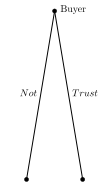

In [13]:
draw_tree(g)

We can then also add the Seller's move in the situation after the Buyer chooses Trust:

In [14]:
g.append_move(
    g.root.children["Trust"],
    player="Seller",
    actions=["Honor", "Abuse"]
)

Writing .ef file to: One-shot trust game, after Kreps (1990).ef


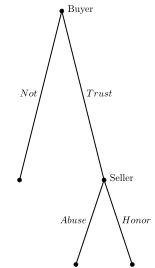

In [15]:
draw_tree(g)

Now that we have the moves of the game defined, we add payoffs.

Payoffs are associated with an `Outcome`; each `Outcome` has a vector of payoffs, one for each player, and optionally an identifying text label.

First we add the outcome associated with the Seller proving themselves trustworthy:

In [16]:
g.set_outcome(
    g.root.children["Trust"].children["Honor"],
    outcome=g.add_outcome(
        payoffs=[1, 1],
        label="Trustworthy"
    )
)

Writing .ef file to: One-shot trust game, after Kreps (1990).ef


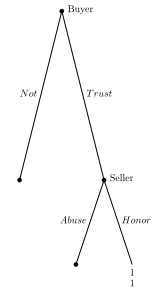

In [17]:
draw_tree(g)

Next, the outcome associated with the scenario where the Buyer trusts but the Seller does not return the trust:

In [18]:
g.set_outcome(
    g.root.children["Trust"].children["Abuse"],
    outcome=g.add_outcome(
        payoffs=[-1, 2],
        label="Untrustworthy"
    )
)

Writing .ef file to: One-shot trust game, after Kreps (1990).ef


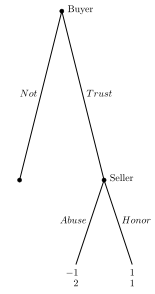

In [19]:
draw_tree(g)

And, finally the outcome associated with the Buyer opting out of the interaction:

In [20]:
g.set_outcome(
    g.root.children["Not trust"],
    g.add_outcome(
        payoffs=[0, 0],
        label="Opt-out"
    )
)

Writing .ef file to: One-shot trust game, after Kreps (1990).ef


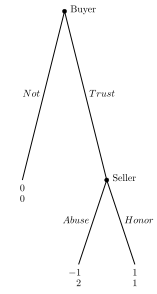

In [21]:
draw_tree(g)

Nodes without an outcome attached are assumed to have payoffs of zero for all players.

Therefore, adding the outcome to this latter terminal node is not strictly necessary in Gambit, but it is useful to be explicit for readability.

Saving and reading extensive-form games to and from file
--------------------

You can use Gambit to save games to, and read from files.
The specific format depends on whether the game is normal or extensive-form.

Here we'll save the Trust game (extensive-form) to the `.efg` format.

In [22]:
# g.to_efg("trust_game.efg")

You can easily restore the game object from file like so:

In [23]:
# gbt.read_efg("trust_game.efg")

#### References

Kreps, D. (1990) "Corporate Culture and Economic Theory." In J. Alt and K. Shepsle, eds., *Perspectives on Positive Political Economy*, Cambridge University Press.